# Python Homework 1

<b> Instructions:</b> This Python Homework will be due on <b> Monday, January 21th, at 11:59 p.m.</b> You have to submit your version of this Jupyter Notebook via GauchoSpace!

In this homework you are supposed to use the random number generater random.random_sample from the numpy package to generate random numbers with three different distributions. 

Recall from the lecture that if $F:\mathbb{R}\rightarrow [0,1]$ is a distribution function with generalized inverse $F^{-1}:[0,1]\rightarrow \mathbb{R}$ and $U$ is a uniform random variable, then $F^{-1}(U)$ is a random variable with distribution function $F$.

Using the function random.random_sample from numpy package write three functions: 
* exponentialRV(seed, mean,n) that returns for given seed a bunch of n random variables from an exponential distribution with the provided mean. Derive the generalized inverse distribution function analytically for your simulation.
* poissonRV(seed, mean,n) that returns for given seed a bunch of n Poisson distributed random numbers with the provided mean. You have to numerically calculate the inverse distribution function.
* funnyDiceRV(seed,n) that returns for given seed a bunch of n random number which describe a biased die with distribution $\mathbb{P}(\{1\})=\mathbb{P}(\{2\})=\mathbb{P}(\{3\})=\mathbb{P}(\{4\})=\mathbb{P}(\{5\})=1/10$ and $\mathbb{P}(\{6\})=1/2$.

In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt

Here should come your code for the three functions:


In [37]:
# author: Sean Han Byul Lee
def exponentialRV(seed, mean,n):
    
    ##Here write your own code
    
    # give seed to random generator
    np.random.seed(seed)
    
    # sample list of u
    listOfUs = np.random.random_sample(n)
    
    # inverse cdf of u
    cdfInvU = -1 * mean * np.log(1-listOfUs)
    
    # give the array cdfInvU to the return value
    expontialSample = cdfInvU
    
    return expontialSample

In [38]:
def poissonRV(seed, mean, n):
   
    ##Here write your own code
    
    # give seed to random generator
    np.random.seed(seed)
    
    # empty poisson sample array
    poissonSample = []
    
    # generate poisson dirstributed random values
    lim = np.exp(-1 * mean)
    
    # taking limit number and find minimum number for inverse poisson
    for i in range(n):
        prod = np.random.random_sample(1)
        poisVal = 0
        while(prod >= lim):
            prod *= np.random.random_sample(1)
            poisVal += 1
        poissonSample.append(poisVal)

    return poissonSample

In [39]:
def funnyDiceRV(seed, n):
      
    ##Here write your own code
    
    # empty list
    funnyDiceSample = []
    np.random.seed(seed)
    
    for i in range(n):
        randomFloat = np.random.random_sample(1)
        # split one random floating sample between 0 and 1 into two.
        # prob of less than 0.5 is roughly 1/2 and we from there, we randomly pick a number between 1 to 5
        if(randomFloat < 0.5):
            randomFloatNew = np.random.random_sample(1)
            funnyDiceSample.append(int (np.random.random_sample()*10)%5 + 1)
        # split the other half probability is 1/2.
        # since prob of getting 6 is 1/2, just append 6
        else:
            funnyDiceSample.append(6)
    
    return funnyDiceSample

# ## test

# def numOfnum(x, n):
#     k = 0
#     for i in x:
#         if i == n:
#             k = k + 1
#     return k

# x = [1,2,3,4,5,6]
# for i in x:
#     print(numOfnum(funnyDiceRV(1, 1000), i))
# print(funnyDiceRV(1, 1000))

In [40]:
print(exponentialRV(1, 2, 5))# You should test all three functions 
print(poissonRV(1, 2, 5))
print(funnyDiceRV(1, 5))

[1.07921167e+00 2.54825051e+00 2.28762717e-04 7.20025510e-01
 3.17419190e-01]
[2, 1, 0, 1, 2]
[1, 1, 4, 6, 3]


You should use the following routine to plot a histogram of the distribution of all three simulated random variables

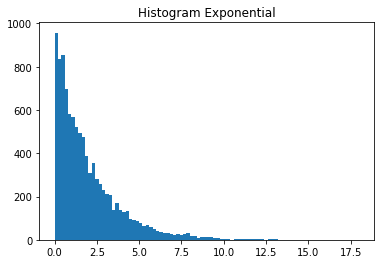

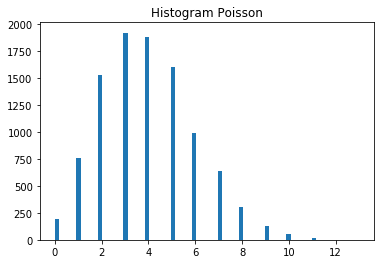

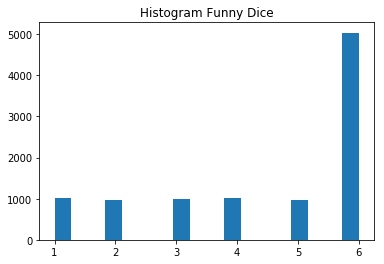

In [41]:
numberSimulations=10000
exponentialSamples=exponentialRV(1, 2,numberSimulations)
poissonSamples=poissonRV(1, 4,numberSimulations)
funnyDiceSamples=funnyDiceRV(1, numberSimulations)

#np.histogram(exponentialSamples)
plt.hist(exponentialSamples, bins='auto')
plt.title("Histogram Exponential")
plt.show()
plt.hist(poissonSamples, bins='auto')
plt.title("Histogram Poisson")
plt.show()
plt.hist(funnyDiceSamples, bins='auto')
plt.title("Histogram Funny Dice")
plt.show()

For the exponential random variable, you should then test the empirical expectation and variance of the random variables you generated. Assume you have generated random variables $X_1,X_2,X_3,\dots,X_n$ calculate the empirical mean 
\begin{equation}
\hat{\text{ }\mu} =\frac{\sum^n_{i=1} X_i}{n}
\end{equation}
and the empirical variance 
\begin{equation}
\hat{\text{ }\sigma} = \frac{\sum^n_{i=1}(X_i - \hat{\mu})^2}{n}
\end{equation}
Use 10000 simulations. In the result of your calculation in line with what you expect? Why?

In [42]:
#Here you add the few lines of code for your calculations

# function to calculate empirical mean
def muHat(seed, mean, n):
    return (sum(exponentialRV(seed, mean, n)))/n

# function to calculate empirical var
def sigHat(seed, mean, n):
    return (sum(np.square(exponentialRV(seed,mean,n)-muHat(seed,mean,n))))/n

In [46]:
# print(muHat(1,2,10000))
# print(sigHat(1,2,5))

In [47]:
simSize = 10000

# let out expected mean be 10. we can compare the mean we put and calculate
# from the generated random numbers from the function
seed = 5
mean = 10
empiricalMean = muHat(seed, mean, simSize)
empiricalVar = sigHat(seed, mean, simSize)
print("Empirical Mean: ", empiricalMean)
print("Empirical Variance: ", empiricalVar)

Empirical Mean:  10.032346722540783
Empirical Variance:  97.6746650096637


In [ ]:
# since the simulatioin size is big enough to expect closer mean and variance with
# what it should be, mean was close enough to 10, which is 10.032.
# Expected variance is 10^2 which is 100. Empirical variance is 97.674, which is close to 100.

In [48]:
print(muHat(1,2,5))

0.9330271286718903


In [49]:
exponentialRV(1,2,5)

array([1.07921167e+00, 2.54825051e+00, 2.28762717e-04, 7.20025510e-01,
       3.17419190e-01])

In [50]:
exponentialRV(1,2,5)-muHat(1,2,5)


array([ 0.14618455,  1.61522338, -0.93279837, -0.21300162, -0.61560794])